In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv('/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/Final_Databases/FULL_MERGED_CLEAN.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGE                777 non-null    int64  
 1   GENDER             777 non-null    int64  
 2   ALBUMIN            777 non-null    float64
 3   BILIRUBIN          777 non-null    float64
 4   ALK_PHOSPHATE      777 non-null    float64
 5   SGOT               777 non-null    float64
 6   ASCITES            777 non-null    int64  
 7   SPIDERS            777 non-null    float64
 8   PROTHROMBIN        777 non-null    float64
 9   HEPATOMEGALY       777 non-null    float64
 10  PALTELETS          777 non-null    float64
 11  STATUS             777 non-null    int64  
 12  CLASS              777 non-null    float64
 13  ALPHA-FETOPROTEIN  777 non-null    float64
 14  FERRITIN           777 non-null    float64
 15  HEMOGLOBIN         777 non-null    float64
 16  PROTINE            777 non

In [4]:
print(df.isnull().sum())

AGE                  0
GENDER               0
ALBUMIN              0
BILIRUBIN            0
ALK_PHOSPHATE        0
SGOT                 0
ASCITES              0
SPIDERS              0
PROTHROMBIN          0
HEPATOMEGALY         0
PALTELETS            0
STATUS               0
CLASS                0
ALPHA-FETOPROTEIN    0
FERRITIN             0
HEMOGLOBIN           0
PROTINE              0
VARICES              0
MALAISE              0
dtype: int64


In [5]:
df["STATUS"].value_counts()

STATUS
0    482
1    295
Name: count, dtype: int64

In [6]:
df["CLASS"].value_counts()

CLASS
1.0    418
3.0    204
2.0    155
Name: count, dtype: int64

In [7]:
df.drop(['CLASS'],axis = 1)

,AGE,GENDER,ALBUMIN,BILIRUBIN,ALK_PHOSPHATE,SGOT,ASCITES,SPIDERS,PROTHROMBIN,HEPATOMEGALY,PALTELETS,STATUS,ALPHA-FETOPROTEIN,FERRITIN,HEMOGLOBIN,PROTINE,VARICES,MALAISE
0,56,1,4.14,1.10,7394.8,113.52,0,1.0,10.6,1.0,221.00,0,9.4,206.0,13.7,7.1,1.0,0.0
1,38,1,3.53,3.40,671.0,113.15,0,1.0,10.9,1.0,136.00,0,9.4,206.0,13.7,7.1,1.0,0.0
2,55,1,4.09,1.00,824.0,60.45,0,0.0,9.7,1.0,204.00,0,9.4,206.0,13.7,7.1,1.0,0.0
3,45,1,3.85,0.70,1181.0,88.35,0,0.0,10.6,0.0,244.00,0,9.4,206.0,13.7,7.1,1.0,0.0
4,40,1,3.66,0.70,685.0,72.85,0,0.0,10.8,0.0,198.00,0,9.4,206.0,13.7,7.1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,70,1,3.18,1.35,117.0,126.00,0,0.0,10.6,1.0,90846.80,1,502.6,873.0,11.1,7.0,1.0,0.0
773,80,1,3.26,1.04,231.0,56.00,1,0.0,10.6,1.0,332033.67,1,2353.7,70.0,12.2,6.5,0.0,0.0
774,80,0,2.93,1.57,304.0,68.00,0,0.0,10.6,1.0,195.76,1,23.4,106.0,10.2,7.0,0.0,0.0
775,74,0,3.31,0.63,197.0,48.00,0,0.0,10.6,1.0,101884.41,1,6.1,859.0,13.0,7.2,1.0,0.0


In [8]:
# X=df.drop(['STATUS','CLASS'],axis = 1)
X=df.drop(['STATUS'],axis = 1)
y=df['STATUS']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (699, 18)
Test Shape: (78, 18)


In [10]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.9102564102564102
Report card of this model - 
              precision    recall  f1-score   support

           0      0.935     0.915     0.925        47
           1      0.875     0.903     0.889        31

    accuracy                          0.910        78
   macro avg      0.905     0.909     0.907        78
weighted avg      0.911     0.910     0.910        78

Accuracy score -  0.9102564102564102


Text(20.72222222222222, 0.5, 'Truth')

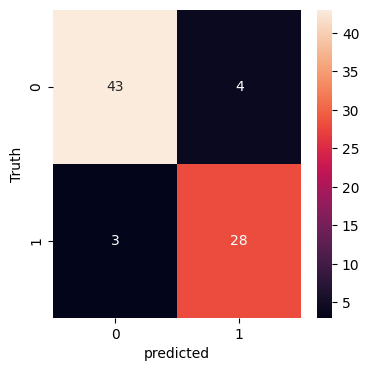

In [11]:
y_predicted = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [12]:
dtree2 = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
dtree2.fit(X_train,y_train)
y_pred_dtree2 = dtree2.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree2, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree2))

Score of the model is -  0.9102564102564102
Report card of this model - 
              precision    recall  f1-score   support

           0      0.882     0.957     0.918        47
           1      0.926     0.806     0.862        31

    accuracy                          0.897        78
   macro avg      0.904     0.882     0.890        78
weighted avg      0.900     0.897     0.896        78

Accuracy score -  0.8974358974358975


Text(20.72222222222222, 0.5, 'Truth')

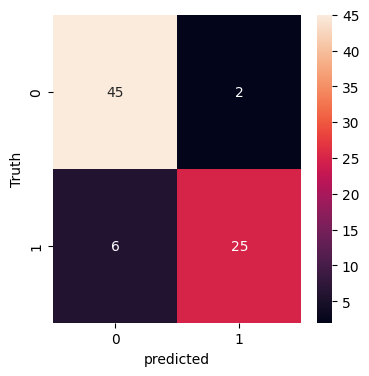

In [13]:
y_predicted = dtree2.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

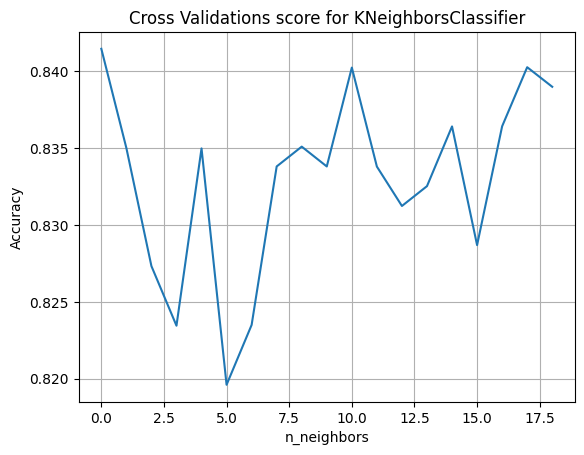

In [14]:
hist = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.8589743589743589
Report card of this model - 
              precision    recall  f1-score   support

           0      0.860     0.915     0.887        47
           1      0.857     0.774     0.814        31

    accuracy                          0.859        78
   macro avg      0.859     0.845     0.850        78
weighted avg      0.859     0.859     0.858        78

Accuracy score -  0.8589743589743589


Text(20.72222222222222, 0.5, 'Truth')

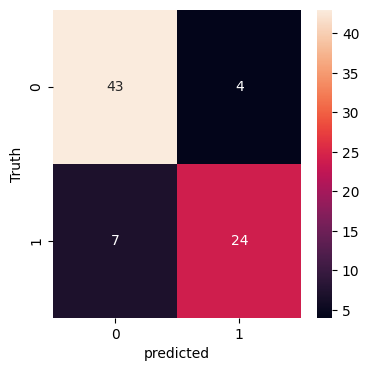

In [16]:
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

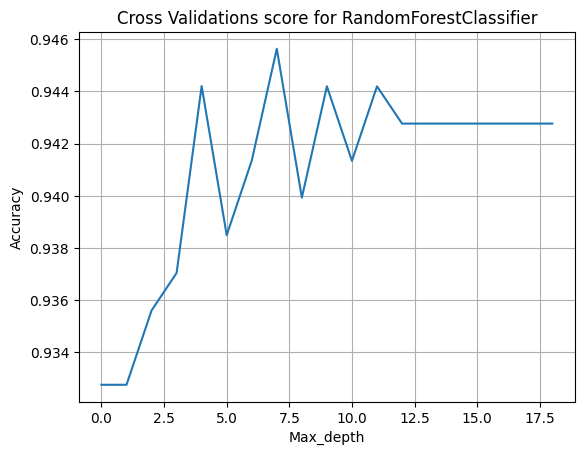

In [17]:
hist1 = []
for i in range(1,20):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [18]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth= 7, random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.9615384615384616
Report card of this model - 
              precision    recall  f1-score   support

           0      0.940     1.000     0.969        47
           1      1.000     0.903     0.949        31

    accuracy                          0.962        78
   macro avg      0.970     0.952     0.959        78
weighted avg      0.964     0.962     0.961        78

Accuracy score -  0.9615384615384616


Text(20.72222222222222, 0.5, 'Truth')

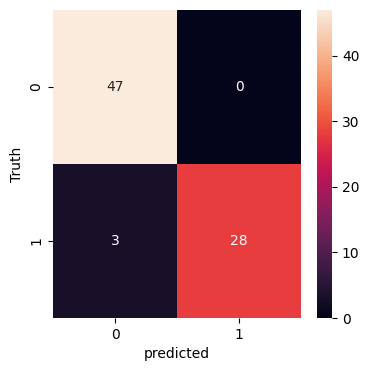

In [19]:
y_predicted = ran_for.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

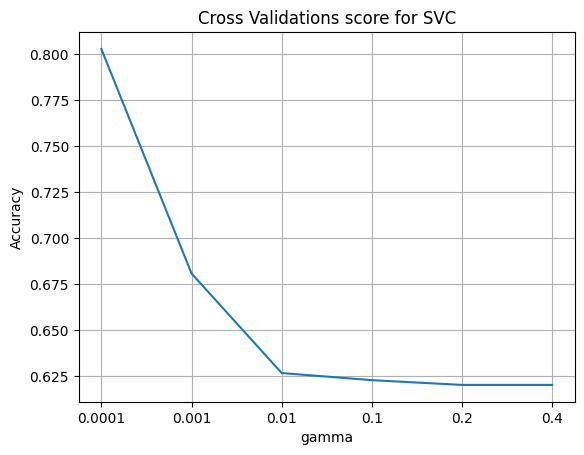

In [20]:
grid = [0.0001,0.001, 0.01, 0.1,0.2,0.4]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [21]:
svm = SVC(kernel= "linear",C=0.01, random_state = 0 )
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

Score of the model is -  0.9358974358974359
Report card of this model - 
              precision    recall  f1-score   support

           0      0.977     0.915     0.945        47
           1      0.882     0.968     0.923        31

    accuracy                          0.936        78
   macro avg      0.930     0.941     0.934        78
weighted avg      0.940     0.936     0.936        78

Accuracy score -  0.9358974358974359


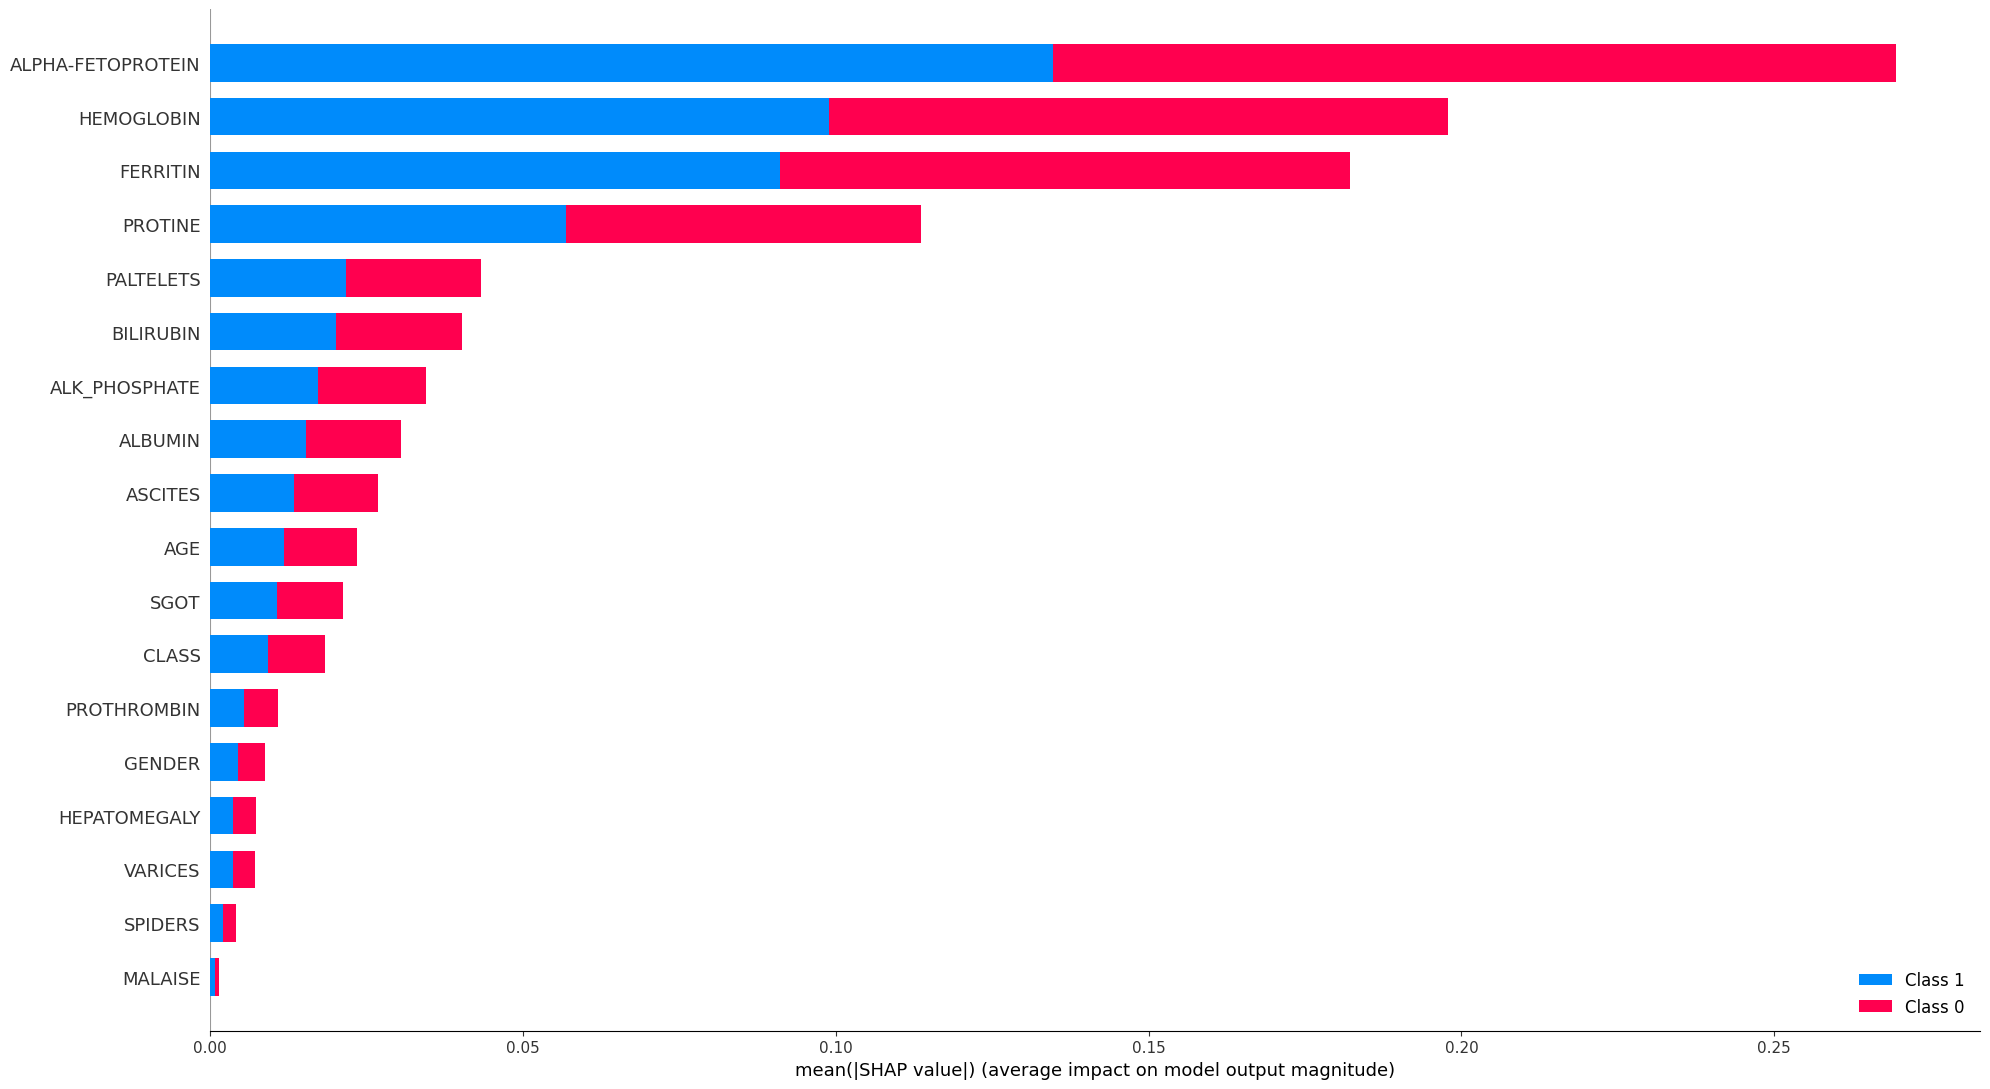

In [22]:
import shap
rfc = RandomForestClassifier(max_features=2,n_estimators=100,bootstrap=True)

rfc.fit(X, y)

explainer = shap.TreeExplainer(rfc)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=(20,11), alpha=0.2, plot_type='bar')